In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')
from matplotlib import rc

plt.rc('text', usetex=True)
plt.rc('font', family='sans')

# Weighted dice 

Dice are used to determine outcomes in a number of games. We use dice because there _should be_ an equal probability of any side showing on top. One way to trick your friends is to purchase a weighted dice. The weighted dice (if it is properly designed) is the same shape and the same mass as a normal, unweighted dice, but it has a higher probability of landing on a 6. _How is that possible_?

## Dice characteristics

The [Dice weights and measurements](https://www.dice.co.uk/outlines.htm) you will consider are as follows

- m = 10.4 g
- L = 22 mm
- $V = 22^3~mm^3 = 10648~mm^3$

First, consider the normal, unweighted dice where the center of mass is in the center of the dice. 

![unweighted dice rotating from 0 to 90 deg](./images/dice-unweighted.svg)

The center of mass is located at point

$\mathbf{r}_{com} = \frac{L}{2}\hat{i} + \frac{L}{2}\hat{j}$

and when the dice rotates from $\theta = 0...90^o$ the new center of mass location is

$\mathbf{r}_{com}^{new} = \mathbf{A}\mathbf{r}_{com}$

where

$\mathbf{A} = 
\left[\begin{array}
~\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta\end{array}\right]$

so 

$\mathbf{r}_{com}^{new} = (\frac{L}{2}\cos\theta - \frac{L}{2}\sin\theta)\hat{i} +
(\frac{L}{2}\sin\theta+ \frac{L}{2}\cos\theta)\hat{j}$

Below, you calculate the potential energy of the dice for a given angle from $\theta = 0...90^o$

as 

$V = mgh = mg\mathbf{r}_{com}^{new}\cdot\hat{j}$

Text(0, 0.5, 'potential energy (mJ)')

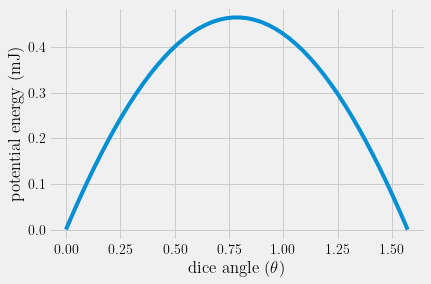

In [79]:
L = 22e-3
m = 10.4e-3
g = 9.81 #m/s/s
theta = np.linspace(0, np.pi/2)
r = L/2*np.vstack([np.cos(theta)-np.sin(theta), np.sin(theta)+np.cos(theta)])
V = (r[1,:]-r[1,:].min())*m*g
# plt.plot(theta, r[0,:])
plt.plot(theta, V*1e3)
plt.xlabel(r'dice angle ($\theta$)')
plt.ylabel('potential energy (mJ)')

## Weighted dice

!nweighted dice rotating from 0 to 90 deg](./images/dice-unweighted.svg)

The weighted dice has the same characteristics as the unweighted dice, but the center of mass is now shifted towards the bottom of the dice by 50%

- m = 10.4 g
- L = 22 mm
- $V = 22^3~mm^3 = 10648~mm^3$
- h = $\frac{L}{4} = 5.5~mm$

Here, you calculate the potential energy from $\theta = 0...90^o$ for the weighted dice compared to the unweighted dice. 

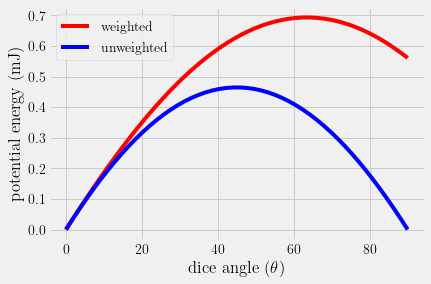

In [115]:
h = 0.25*L

theta = np.linspace(0, np.pi/2)
r_weighted = np.vstack([L/2*np.cos(theta)-h*np.sin(theta), L/2*np.sin(theta)+h*np.cos(theta)])
V_weighted = (r_weighted[1,:]-r_weighted[1,:].min())*m*g
# plt.plot(theta, r[0,:])
plt.plot(theta*180/np.pi, V_weighted*1e3, 'r-', label = 'weighted')
plt.plot(theta*180/np.pi, V*1e3, 'b-', label = 'unweighted')

plt.xlabel(r'dice angle ($\theta$)')
plt.ylabel('potential energy (mJ)')
plt.legend();

To get from $\theta=0^o~to\theta=90^o$, the total energy change is 0 for the unweighted dice. The weighted dice has an increase in energy of 0.55 mJ. In order to rotate the unweighted dice, the system needs a minum of 0.2 mJ. For the weighted dice, the system needs 0.7 mJ. 

These are _small_ energy values. Dropping the dice from 1 inch above a table gives 2 mJ of energy, more than enough to bounce the dice from one side to another. The 

> __Reflection question__: What is the minimum distance you need to drop an unweighted dice to have it change sides once?

The _real trick_ to the weighted dice is that the _global energy miminum_ is designed to land on the chose side e.g. 6. If its given enough kinetic energy that it can dissipate through impacts, it will naturally land on 6. Below, the changes in potential energy are shown from $\theta = 0...360^o$ (_four full rotations_) for the unweighted and weighted dice. 

Text(0, 0.5, 'potential energy (mJ)')

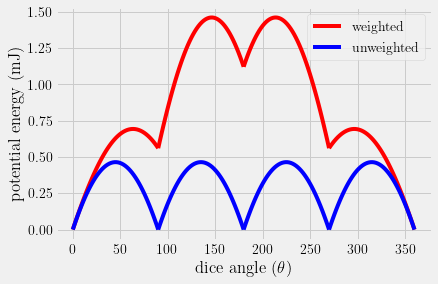

In [112]:
theta_2 = np.linspace(0, np.pi/2)
r_weighted_2 = np.vstack([(L-h)*np.cos(theta)-L/2*np.sin(theta), 
                          (L-h)*np.sin(theta)+L/2*np.cos(theta)])
V_weighted_2 = (r_weighted_2[1, :] - r_weighted[1,:].min())*m*g

r_weighted_3 = np.vstack([L/2*np.cos(theta)-(L-h)*np.sin(theta), 
                          L/2*np.sin(theta)+(L-h)*np.cos(theta)])
V_weighted_3 = (r_weighted_3[1, :] - r_weighted[1,:].min())*m*g

r_weighted_4 = np.vstack([h*np.cos(theta)-(L/2)*np.sin(theta), 
                          h*np.sin(theta)+(L/2)*np.cos(theta)])
V_weighted_4 = (r_weighted_4[1, :] - r_weighted[1,:].min())*m*g

plt.plot(theta*180/np.pi, V_weighted*1e3, 'r-', label = 'weighted')
plt.plot(theta*180/np.pi + 90, V_weighted_2*1e3, 'r-')
plt.plot(theta*180/np.pi + 180, V_weighted_3*1e3, 'r-')
plt.plot(theta*180/np.pi + 270, V_weighted_4*1e3, 'r-')

plt.plot(theta*180/np.pi, V*1e3, 'b-', label = 'unweighted')
plt.plot(theta*180/np.pi + 90, V*1e3, 'b-')
plt.plot(theta*180/np.pi + 180, V*1e3, 'b-')
plt.plot(theta*180/np.pi + 270, V*1e3, 'b-')

plt.legend()
plt.xlabel(r'dice angle ($\theta$)')
plt.ylabel('potential energy (mJ)')

## Wrapping up

In this notebook, you calculated the potential energy of a dice sitting on a table and the minimum amount of energy needed to rotate the dice to another side. Then, you considered a weighted dice that has the same mass, but shifted away from the 6-side. 

You found that shifting the center of mass lower by 5.5 mm led to higher potential energy on every other side and larger energies needed to rotate to another side. 